### Name: Nirajan Khatiwada

### Data Science Intern at Oasis Infobyte

### Task 4 - Email Spam Detection Withh Machine Learning

#### Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Loading and Preprocessing Dataset

In [3]:
# Loading the dataset
email = pd.read_csv("spam.csv",encoding='ISO-8859-1')
email

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# To get the shape of the data
email.shape

(5572, 5)

In [5]:
# Checking for missing values
email.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
# To get information about the data
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop unnecessary columns
email.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
# Rename columns
email = email.rename(columns={'v1': 'Category', 'v2': 'Message'})

In [9]:
# Map 'spam' to 0 and 'ham' to 1
email.loc[email['Category'] == 'spam', 'Category'] = 0
email.loc[email['Category'] == 'ham', 'Category'] = 1

In [10]:
# Displaying basic statistics and information about the dataset
print(email.info())
print(email.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
        Category                 Message
count       5572                    5572
unique         2                    5169
top            1  Sorry, I'll call later
freq        4825                      30


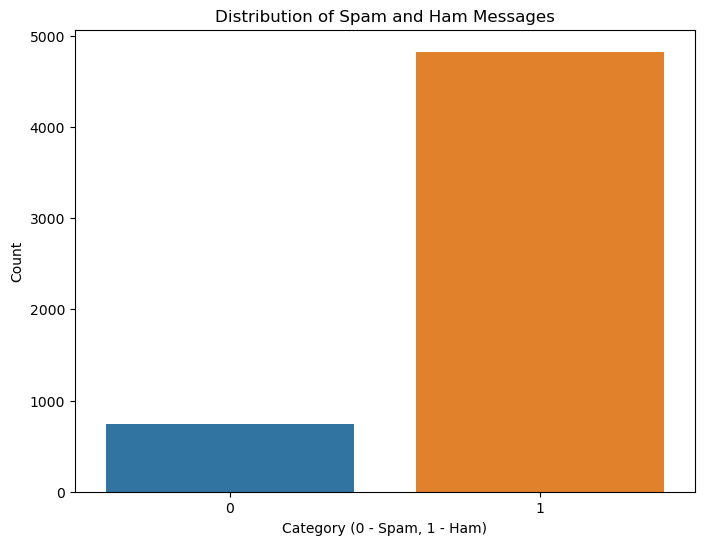

In [11]:
# Visualize the distribution of spam and ham messages
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=email)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Category (0 - Spam, 1 - Ham)')
plt.ylabel('Count')
plt.show()

#### Splitting the Data

In [12]:
# Split the data into features (X) and labels (y)
X = email['Message']
y = email['Category']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#### Feature Extraction using TF-IDF

In [14]:
# Feature extraction using TF-IDF vectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [15]:
# Convert labels to integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

#### Train a Logistic Regression Model

In [16]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

#### Evaluating the Model

In [17]:
# Evaluate the model on the training data
y_train_pred = model.predict(X_train_features)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred)
print("Accuracy for training data:", accuracy_on_train_data)

Accuracy for training data: 0.9661207089970832


In [18]:
# Evaluate the model on the testing data
y_pred = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, y_pred)
print("Accuracy for testing data:", accuracy_on_test_data)

Accuracy for testing data: 0.9623318385650225


In [19]:
# Display the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [20]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[114  41]
 [  1 959]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.84       155
           1       0.96      1.00      0.98       960

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



#### Making Predictions

In [21]:
# Make predictions for a sample input email
input_user_email = ["Java/Asp.net/Design Engineer/Software Testing/PHP/web/Networking/Software Developer/Python,Angular, Data Scientist,Salesforce,Had"]
input_data_features = feature_extraction.transform(input_user_email)
prediction = model.predict(input_data_features)

In [22]:
if prediction == 1:
    print("It is ham mail")
else:
    print("It is spam mail")

It is ham mail
